### JMJ+

### Problem Statement:

* Using the given attributes, design a model that predicts, whether a employee(driver) will churn or not
* Moreover, help Ola understand the critical factors for driver retention, thereby improving the attrition rate

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter

from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate,GridSearchCV

from xgboost import XGBClassifier

import datetime as dt

from sklearn.metrics import (confusion_matrix,ConfusionMatrixDisplay,
roc_curve,roc_auc_score,precision_recall_curve,auc,classification_report,f1_score)

import warnings
warnings.filterwarnings('ignore')

In [3]:
path=r'C:\Users\Alfred Paul\OneDrive\Desktop\Scaler_CaseStudies\Dataset\JMJ_ola_driver_scaler.csv'

In [4]:
df=pd.read_csv(path)

### Basic Analysis:

In [5]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


##### Creating a copy of the orginal file:

In [6]:
df_orginal=df.copy()

In [7]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [8]:
# Basic info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


##### Basic analysis shows that:

* Majority of features are int, followed by object type and float
* Many of the features have null values and requires data preprocessing

In [9]:
df[:10]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


##### Analysing 'Driver_ID'

In [10]:
df['Driver_ID'].value_counts()

2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: Driver_ID, Length: 2381, dtype: int64

* It can be observed that lot of 'Driver_ID' are redundant 

In [11]:
df['Driver_ID'].unique()


array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

In [12]:
df['Driver_ID'].nunique()

2381

In [13]:
2788-2381

407

* Though 'Driver_ID' varies from 1 to 2788 , there are only 2381 distinct values of 'Driver_ID'
* It means that, 2788-2381 = 407 ID's are missing or duplicated

### Simple feature engineering:

##### Feature : 1

* Creating a column, in which value 1 is assigned for those drivers whose quaterly rating has improved and 0 otherwise 

In [14]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [15]:

# Getting the first rating for each Driver_ID
df_temp_rating = df[['Driver_ID', 'Quarterly Rating']].groupby('Driver_ID').first().reset_index()

# Renaming the feature as 'Quaterly_Rating_initial'
df_temp_rating.rename(columns={'Quarterly Rating':'Quaterly_Rating_initial'},inplace=True)

# Getting the last rating for each Driver_ID
df_temp_rating['Quaterly_Rating_final']=df[['Driver_ID', 
                                        'Quarterly Rating']].groupby('Driver_ID').last().reset_index()['Quarterly Rating']

# Assigning 1 if rating has improved, otherwise 0
df_temp_rating['Quaterly_Rating_improvement']=np.where(
    df_temp_rating['Quaterly_Rating_final']-df_temp_rating['Quaterly_Rating_initial']>0,1,0)

In [16]:
df_temp_rating.head()

,Driver_ID,Quaterly_Rating_initial,Quaterly_Rating_final,Quaterly_Rating_improvement
0,1,2,2,0
1,2,1,1,0
2,4,1,1,0
3,5,1,1,0
4,6,1,2,1


In [17]:
df_temp_rating.drop(columns=['Quaterly_Rating_final','Quaterly_Rating_initial'],inplace=True)

In [18]:
df_temp_rating.head()

,Driver_ID,Quaterly_Rating_improvement
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1


In [19]:
df_temp_rating['Quaterly_Rating_improvement'].value_counts(normalize=True)

0    0.849643
1    0.150357
Name: Quaterly_Rating_improvement, dtype: float64

It can be observed that only small proportion of drivers(~15%) improved their rating

##### Feature:2

Creating a column, in which value 1 is assigned for those drivers whose monthly income has improved and 0 otherwise

In [20]:
# Getting the initial rating for each Driver_ID
df_temp_income = df[['Driver_ID','Income']].groupby('Driver_ID').first().reset_index()

# Renaming the feature to 'Initial_Income'
df_temp_income.rename(columns={'Income':'Initial_Income'},inplace=True)

# Getting the final rating for each Driver_ID
df_temp_income['Final_Income']=df[['Driver_ID',
                                   'Income']].groupby('Driver_ID').last().reset_index()['Income']

# Assigning 1 if income has improved, otherwise 0
df_temp_income['Income_Increment']=np.where(
    df_temp_income['Final_Income']-df_temp_income['Initial_Income']>0,1,0)

In [21]:
df_temp_income.drop(columns=['Initial_Income','Final_Income'],inplace=True)

In [22]:
df_temp_income.head()

,Driver_ID,Income_Increment
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [23]:
df_temp_income['Income_Increment'].value_counts(normalize=True)

0    0.98194
1    0.01806
Name: Income_Increment, dtype: float64

It can be observed that only small proportion of drivers(~1.8%) improved their income

In [24]:
# Creating a dictionary to store the aggregation conditions
# for each features

emp_dict={
    'MMM-YY':'last',
    'Driver_ID':'first',
    'Age':'last',
    'Gender':'last',
    'City':'last',
    'Education_Level':'last', 
    'Income':'last',
    'Dateofjoining':'first',
    'LastWorkingDate':'last',
    'Joining Designation':'first',
    'Grade':'last',
    'Total Business Value':'sum',
    'Quarterly Rating':'last'   
}

##### Creating dataframe with unique driver id

In [25]:
# Applying aggregation function to each unique 'Driver_ID' 
# and creating each row with unique 'Driver_ID'

df_uniue_id = df.groupby('Driver_ID').agg(emp_dict).reset_index(drop=True)

In [26]:
df_uniue_id[:10]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,1715580,2
1,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,None,2,2,0,1
2,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,350000,1
3,03/01/19,5,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,120360,1
4,12/01/20,6,31.0,1.0,C11,1,78728,31/07/20,None,3,3,1265000,2
5,11/01/20,8,34.0,0.0,C2,0,70656,19/09/20,15/11/20,3,3,0,1
6,12/01/20,11,28.0,1.0,C19,2,42172,12/07/20,None,1,1,0,1
7,12/01/19,12,35.0,0.0,C23,2,28116,29/06/19,21/12/19,1,1,2607180,1
8,11/01/20,13,31.0,0.0,C19,2,119227,28/05/15,25/11/20,1,4,10213040,1
9,12/01/20,14,39.0,1.0,C26,0,19734,16/10/20,None,3,3,0,1


In [27]:
# Merging 'Quaterly_Rating_improvement' corresponding to each unique 'Driver_ID'

df_2 = pd.merge(df_uniue_id,df_temp_rating,how='inner', on='Driver_ID')

In [28]:
# Merging 'Income_Increment' corresponding to each unique 'Driver_ID'

df_2 = pd.merge(df_2, df_temp_income, how='inner', on='Driver_ID')

In [29]:
df_2.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quaterly_Rating_improvement,Income_Increment
0,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,1715580,2,0,0
1,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,None,2,2,0,1,0,0
2,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,350000,1,0,0
3,03/01/19,5,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,120360,1,0,0
4,12/01/20,6,31.0,1.0,C11,1,78728,31/07/20,None,3,3,1265000,2,1,0


In [30]:
# Checking whether count of 'Driver_ID' are same before and after aggregation:

df_2['Driver_ID'].nunique() == df['Driver_ID'].nunique()

True

### Target feature creation:

##### Analysing 'LastWorkingDate':

In [31]:
df_2['LastWorkingDate'][:10]

0    03/11/19
1        None
2    27/04/20
3    03/07/19
4        None
5    15/11/20
6        None
7    21/12/19
8    25/11/20
9        None
Name: LastWorkingDate, dtype: object

* It can be observed that for 'LastWorkingDate', lot of the values are None
* 'None' indicates that, the driver is still continuing in the company and if it has a paricular date the driver has churned

##### Conditions for class:1
* P(y=1|xi)--> driver churned

##### Conditions for class:0
* P(y=0|xi)--> driver not churned

In [32]:
# Creating a feature 'Churn' and assigning 0  if the value is None (not churned)
# else assigning 1(churned)

df_2['Churn']=df_2['LastWorkingDate'].apply(lambda x:0 if x == None else 1)

##### Dropping 'LastWorkingDate' as the corresponding values have been mapped to 'Churn'

In [33]:
df_2.drop(columns=['LastWorkingDate'],inplace = True)

In [34]:
df_2.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quaterly_Rating_improvement,Income_Increment,Churn
0,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,1715580,2,0,0,1
1,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0,0,0
2,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,2,2,350000,1,0,0,1
3,03/01/19,5,29.0,0.0,C9,0,46368,01/09/19,1,1,120360,1,0,0,1
4,12/01/20,6,31.0,1.0,C11,1,78728,31/07/20,3,3,1265000,2,1,0,0


In [35]:
# Checking the count of null values:

df_2.isna().sum()

MMM-YY                         0
Driver_ID                      0
Age                            0
Gender                         0
City                           0
Education_Level                0
Income                         0
Dateofjoining                  0
Joining Designation            0
Grade                          0
Total Business Value           0
Quarterly Rating               0
Quaterly_Rating_improvement    0
Income_Increment               0
Churn                          0
dtype: int64

In [36]:
print(f"Initial no. of rows are: {df.shape[0]}")
print(f"After the aggregation, the no. of rows are: {df_2.shape[0]}")
print(f"The count of rows reduced by: {df.shape[0]-df_2.shape[0]}")

Initial no. of rows are: 19104
After the aggregation, the no. of rows are: 2381
The count of rows reduced by: 16723


##### Observations:
1. Each row contains unique driver id after the aggregation and the redundant ID's have been removed
2. Target feature, 'Churn' has been created based on the values of 'LastWorkingDate'
3. Additional features('Quaterly_Rating_improvement', 'Income_Increment') have been created
4. After the aggregation, count of null values = 0

### Basic feature engineering is completed and EDA can be carried out:

In [37]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MMM-YY                       2381 non-null   object 
 1   Driver_ID                    2381 non-null   int64  
 2   Age                          2381 non-null   float64
 3   Gender                       2381 non-null   float64
 4   City                         2381 non-null   object 
 5   Education_Level              2381 non-null   int64  
 6   Income                       2381 non-null   int64  
 7   Dateofjoining                2381 non-null   object 
 8   Joining Designation          2381 non-null   int64  
 9   Grade                        2381 non-null   int64  
 10  Total Business Value         2381 non-null   int64  
 11  Quarterly Rating             2381 non-null   int64  
 12  Quaterly_Rating_improvement  2381 non-null   int32  
 13  Income_Increment  

##### If reporting date and joining date are subtracted, total duration of the driver with the firm can be found out.

In [38]:
# 1. Converting Reporting Date to datetime format:
df_2['MMM-YY']=pd.to_datetime(df_2['MMM-YY'])

# 2. Converting Dateofjoining to datetime format:
df_2['Dateofjoining'] = pd.to_datetime(df_2['Dateofjoining'])

# 3. Extracting year from Reporting Date and JoiningYear
df_2['Reporting_year'] = pd.DatetimeIndex(df_2['MMM-YY']).year
df_2['JoiningYear'] = pd.DatetimeIndex(df_2['Dateofjoining']).year

# 4. Calculating the total years stayed by the driver:
df_2['Tenure'] = df_2['Reporting_year']-df_2['JoiningYear']

In [39]:
df_2.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quaterly_Rating_improvement,Income_Increment,Churn,Reporting_year,JoiningYear,Tenure
0,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,1715580,2,0,0,1,2019,2018,1
1,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,2,2,0,1,0,0,0,2020,2020,0
2,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2,2,350000,1,0,0,1,2020,2019,1
3,2019-03-01,5,29.0,0.0,C9,0,46368,2019-01-09,1,1,120360,1,0,0,1,2019,2019,0
4,2020-12-01,6,31.0,1.0,C11,1,78728,2020-07-31,3,3,1265000,2,1,0,0,2020,2020,0


##### Statistical summary:

In [40]:
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Quarterly Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quaterly_Rating_improvement,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


In [41]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   MMM-YY                       2381 non-null   datetime64[ns]
 1   Driver_ID                    2381 non-null   int64         
 2   Age                          2381 non-null   float64       
 3   Gender                       2381 non-null   float64       
 4   City                         2381 non-null   object        
 5   Education_Level              2381 non-null   int64         
 6   Income                       2381 non-null   int64         
 7   Dateofjoining                2381 non-null   datetime64[ns]
 8   Joining Designation          2381 non-null   int64         
 9   Grade                        2381 non-null   int64         
 10  Total Business Value         2381 non-null   int64         
 11  Quarterly Rating             2381 non-null 

### Univariate analysis: Numerical features

In [42]:
num_cols = ['Income', 'Total Business Value'] 

In [43]:
# Function for creating the stacked box plot and distplot

def dist_box(data):
    
    Name=data.name.upper()
    sns.set(style='darkgrid')
    fig,(ax_box,ax_dist)=plt.subplots(2,sharex=True,
                                     gridspec_kw={'height_ratios':(0.25,0.75)},
                                     figsize=(7,7))
    
    mean=data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    
    fig.suptitle('\n Spread of data for: '+Name, fontsize=17, fontweight = 'bold')
    
    sns.boxplot(x=data, showmeans=True, orient='h', color='violet', ax=ax_box)
    ax_box.set(xlabel='')
    
    sns.distplot(data, ax=ax_dist, kde=True, color='blue')
    
    ax_dist.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dist.axvline(mean, color='g', linestyle='-', linewidth=2)
    ax_dist.axvline(mean, color='b', linestyle='--', linewidth=2)
    
    plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
    plt.show()
    

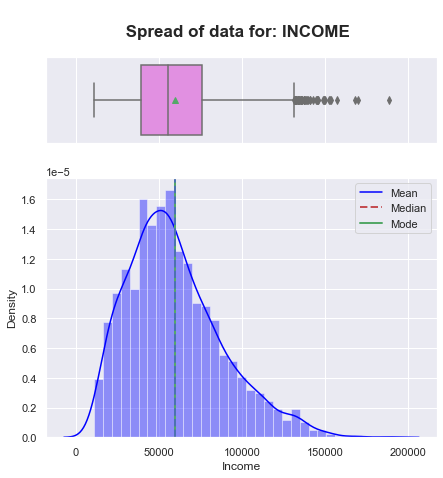

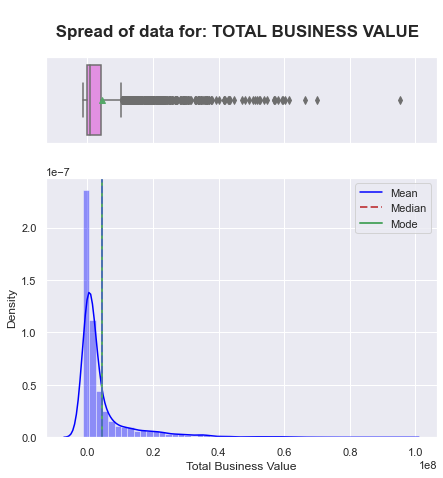

In [44]:
# Function call for the numerical features:

for i in range(len(num_cols)):
    dist_box(df_2[num_cols[i]])

##### Observations:

1. Median income ~ Rs.55,000 and there are few outliers associated with this feature
2. Median value for 'Total Business Value' ~ 810000. Plot is highly right skewed

### Univariate analysis: Categorical features

In [45]:
cat_cols = ['Age', 'City', 'Gender', 'Education_Level', 'Joining Designation',
            'Grade', 'Quarterly Rating', 'Quaterly_Rating_improvement', 'Income_Increment',
            'Churn', 'Reporting_year', 'JoiningYear', 'Tenure']

In [46]:
cat_cols.remove('Reporting_year')

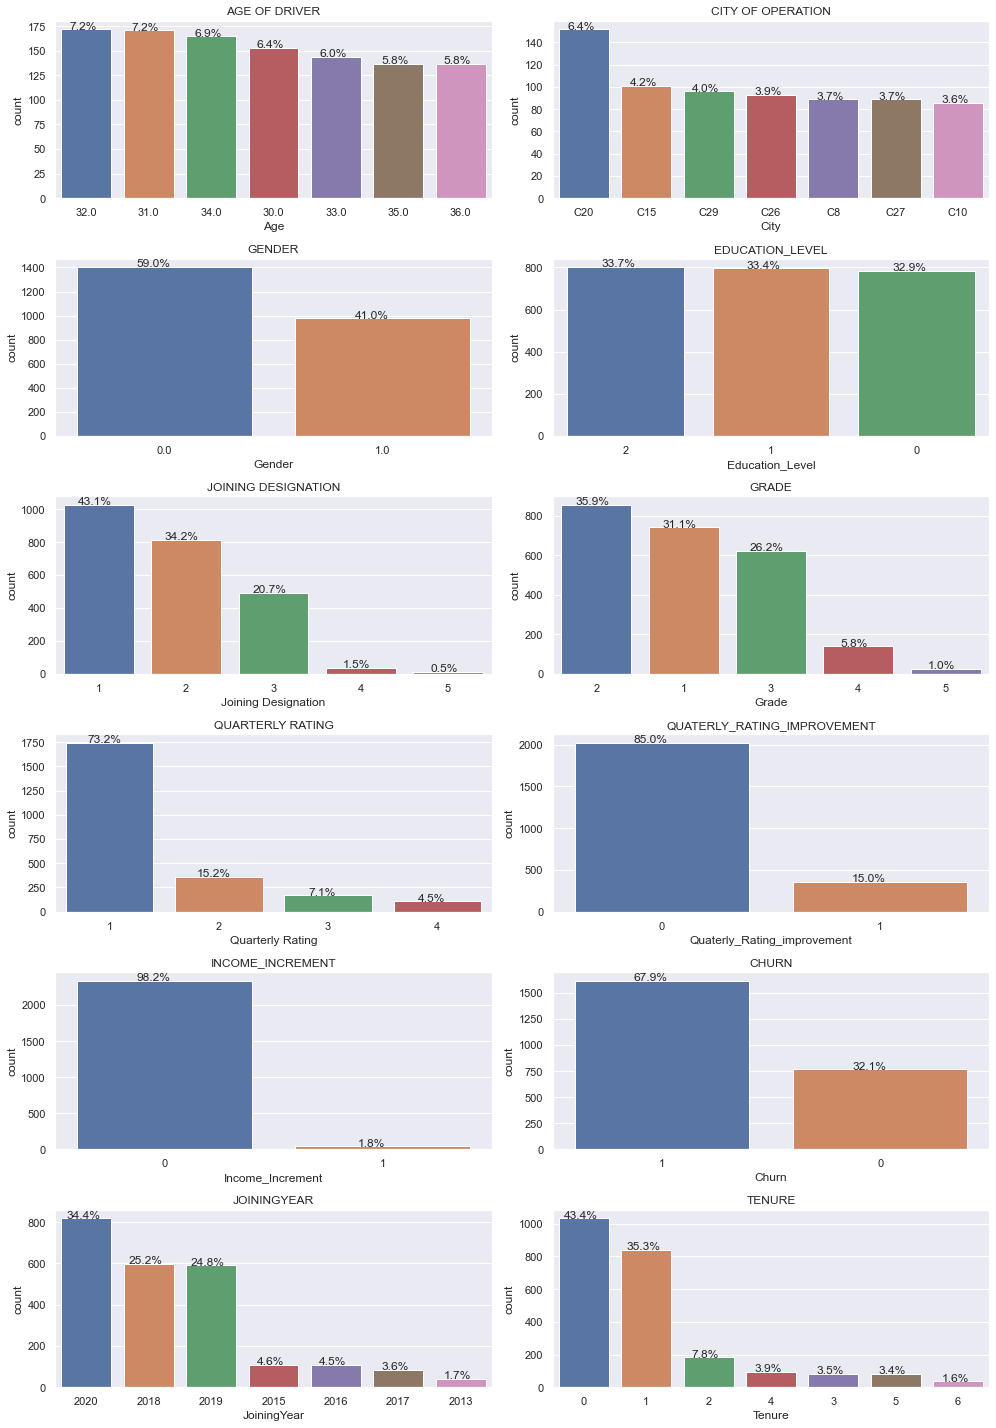

In [47]:
# Code snippet to create count plot for the categorical features:

cat_cols
title=['Age of Driver', 'City of Operation', 'Gender', 'Education_Level',
      'Joining Designation', 'Grade', 'Quarterly Rating', 'Quaterly_Rating_improvement',
      'Income_Increment', 'Churn', 'JoiningYear', 'Tenure' ]

plt.figure(figsize=(14,20))
sns.set(style='darkgrid')

for i, variable in enumerate(cat_cols):
    plt.subplot(6,2,i+1)
    ax=sns.countplot(x=df_2[variable], data=df_2,  
                     order=df_2[variable].value_counts(ascending=False).iloc[:7].index)
    
    for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_2[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())
        
    

##### Observations based on categorical features:

1. Age of Driver: is mostly > 30

2. City of Operation: C_20 has the largest contribution and other cities have a similar proportion

3. Gender: Male(0) has slightly higher proportion compared to the females(1)

4. Education_Level: All the classes has near similar proportion

5. Joining Designation: Most of the drivers have entry level designation(~ 43%) and the proportion gets narrower as the designation improves

6. Grade: ~ 90% the drivers belongs to grade: 1-3

7. Quarterly Rating: Majority of the drivers(~ 73%) have the minimum rating(rating of 1)

8. Quaterly_Rating_improvement: Only a small portion ~ 15% showed improvement in rating compared to their earlier performance

9. Income_Increment: ~ 98% drivers showed no improvement in income

10. Churn(Target variable): ~ 68% drivers churned(left the company)

11. JoiningYear: ~ 80% of the drivers joined between 2018 - 2020

12. Tenure: ~ 78% of the drivers only stay between 0-1 year in the firm 


### Bivariate analysis for numerical features: 

In [48]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

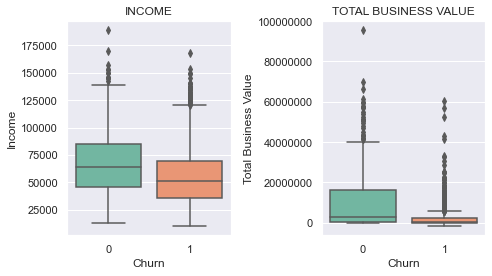

In [49]:
# Code to create boxplots for numerical features:

plt.figure(figsize=(7,4))
sns.set_palette(sns.color_palette("Set2", 8))

for i, variable in enumerate(num_cols):
    ax1=plt.subplot(1,2,i+1)
    
    sns.boxplot(x='Churn', y=df_2[variable], data=df_2)

    ax1.ticklabel_format(useOffset=False, style='plain', axis='y') # to change the y axis formatting
    plt.tight_layout()
    plt.title(variable.upper())




##### Observations:

1. Median income for drivers left < median income for drivers staying 

2. Toatal business value created by the churned drivers < business value created by the non - churned drivers

### Bivariate analysis for categorical features: 

In [50]:
# Code to remove the redundant items from the list:

cat_cols_2 = [i for i in cat_cols if(i!='Churn')]

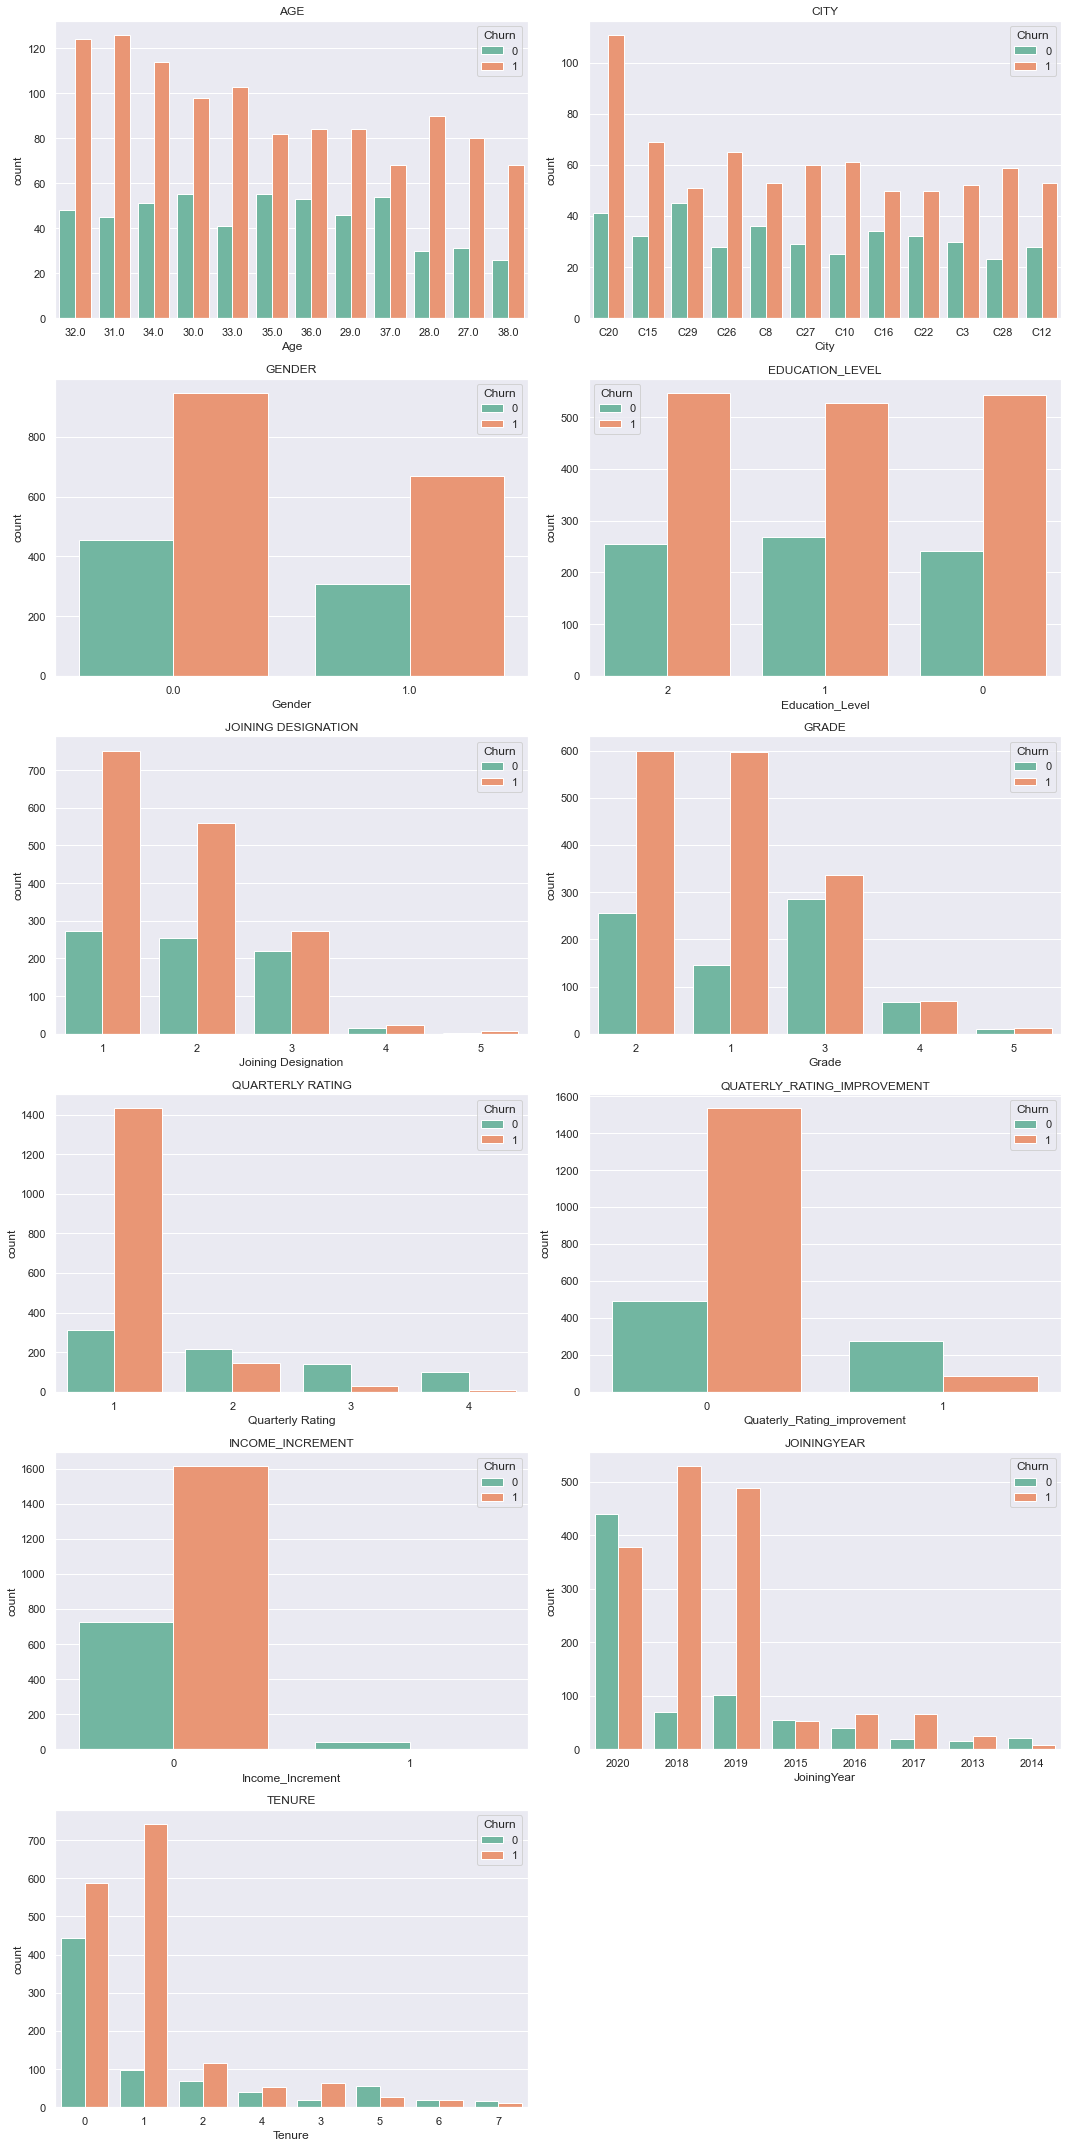

In [51]:
# Code to generate countplot for categorical features:

plt.figure(figsize=(15,30))
sns.set_palette(sns.color_palette("Set2", 8))

for i,variable in enumerate(cat_cols_2):
    
    plt.subplot(6,2,i+1)
    sns.countplot(x=df_2[variable], hue='Churn', data=df_2,
                 order=df_2[variable].value_counts(ascending=False).iloc[:12].index)
    
    plt.tight_layout()
    plt.title(variable.upper())

    

##### Observations:

1. Age: younger drivers are more likely to churn compared to the senior ones
2. City: most of the cities show a similar proportion with respect to churning
3. Gender: male drivers churn more compared to the female counterparts
4. Education level: almost all the categories show a similar proportion with respect to churning
5. Joining Designation: junior designation drivers switch the companies compared to the senior designation drivers
6. Grade: Lower the grade, higher the churning rate
7. Quaterly Rating: Highest churning rate is for the lowest rating(rating:1)
8. Quaterly Rating Improvement: Most of the drivers leave the company, if there are no improvement in their rating
9. Income improvement: Most of the drivers leave the company, if there are no improvement in their income
10. Joining Year: Most of the churning happened for the drivers who joined between 2018-2020
11. Tenure: Most of the churned drivers haved a experience of 0-1 year


### Doing further feature engineering:
    * Reporting date can be split to ---> Reporting month and year
    * Dateofjoining can be split to ---> Joining month and year

In [52]:
# Extracting reporting month:
df_2['Reporting_Month'] = pd.DatetimeIndex(df_2['MMM-YY']).month

# Extracting joining month:
df_2['Joining_Month'] = pd.DatetimeIndex(df_2['Dateofjoining']).month

In [53]:
# Dropping 'MMM-YY' and 'Dateofjoining':

df_2.drop(columns=['MMM-YY', 'Dateofjoining', 'Driver_ID'],inplace=True)

In [54]:
# updated columns:

df_2.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Quaterly_Rating_improvement', 'Income_Increment',
       'Churn', 'Reporting_year', 'JoiningYear', 'Tenure', 'Reporting_Month',
       'Joining_Month'],
      dtype='object')

In [133]:
values=['Income','Quarterly Rating','JoiningYear','Tenure','Education_Level','Grade','Reporting_year','Total Business Value']

for i,variable in enumerate(values):
    print(f"Study of Median {variable.upper()} wrto Churn ")
    print('*'*33)
    print(df_2.groupby(by='Churn').median()[variable])
    print('='*75)



Study of Median INCOME wrto Churn 
*********************************
Churn
0    64154.0
1    51630.0
Name: Income, dtype: float64
Study of Median QUARTERLY RATING wrto Churn 
*********************************
Churn
0    2.0
1    1.0
Name: Quarterly Rating, dtype: float64
Study of Median JOININGYEAR wrto Churn 
*********************************
Churn
0    2020.0
1    2019.0
Name: JoiningYear, dtype: float64
Study of Median TENURE wrto Churn 
*********************************
Churn
0    0.0
1    1.0
Name: Tenure, dtype: float64
Study of Median EDUCATION_LEVEL wrto Churn 
*********************************
Churn
0    1.0
1    1.0
Name: Education_Level, dtype: float64
Study of Median GRADE wrto Churn 
*********************************
Churn
0    2.0
1    2.0
Name: Grade, dtype: float64
Study of Median REPORTING_YEAR wrto Churn 
*********************************
Churn
0    2020.0
1    2019.0
Name: Reporting_year, dtype: float64
Study of Median TOTAL BUSINESS VALUE wrto Churn 
***************

In [55]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          2381 non-null   float64
 1   Gender                       2381 non-null   float64
 2   City                         2381 non-null   object 
 3   Education_Level              2381 non-null   int64  
 4   Income                       2381 non-null   int64  
 5   Joining Designation          2381 non-null   int64  
 6   Grade                        2381 non-null   int64  
 7   Total Business Value         2381 non-null   int64  
 8   Quarterly Rating             2381 non-null   int64  
 9   Quaterly_Rating_improvement  2381 non-null   int32  
 10  Income_Increment             2381 non-null   int32  
 11  Churn                        2381 non-null   int64  
 12  Reporting_year               2381 non-null   int64  
 13  JoiningYear       

### Note !!!
* It can be noted that, other than 'City', all the features are numerical. 
* 'City' can be made into numerical by median imputation using 'Total Business Value'
* This can be done after test train split

### Train - test split:

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# defining X and Y:

X=df_2[df_2.columns.drop('Churn')]
Y=df_2['Churn']

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, shuffle=True)

In [59]:
print(
    f"Sizes of the set created are: \n*Training set:{X_train.shape[0]}\n*Testing set:{X_test.shape[0]}")

Sizes of the set created are: 
*Training set:1595
*Testing set:786


In [60]:
df_2

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quaterly_Rating_improvement,Income_Increment,Churn,Reporting_year,JoiningYear,Tenure,Reporting_Month,Joining_Month
0,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0,1,2019,2018,1,3,12
1,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0,2020,2020,0,12,11
2,43.0,0.0,C13,2,65603,2,2,350000,1,0,0,1,2020,2019,1,4,12
3,29.0,0.0,C9,0,46368,1,1,120360,1,0,0,1,2019,2019,0,3,1
4,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0,2020,2020,0,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,C24,0,82815,2,3,21748820,4,1,0,0,2020,2015,5,12,10
2377,34.0,1.0,C9,0,12105,1,1,0,1,0,0,1,2020,2020,0,10,8
2378,45.0,0.0,C19,0,35370,2,2,2815090,1,0,0,1,2019,2018,1,9,7
2379,28.0,1.0,C20,2,69498,1,1,977830,1,0,0,1,2019,2018,1,6,7


##### Preparing the heatmap:

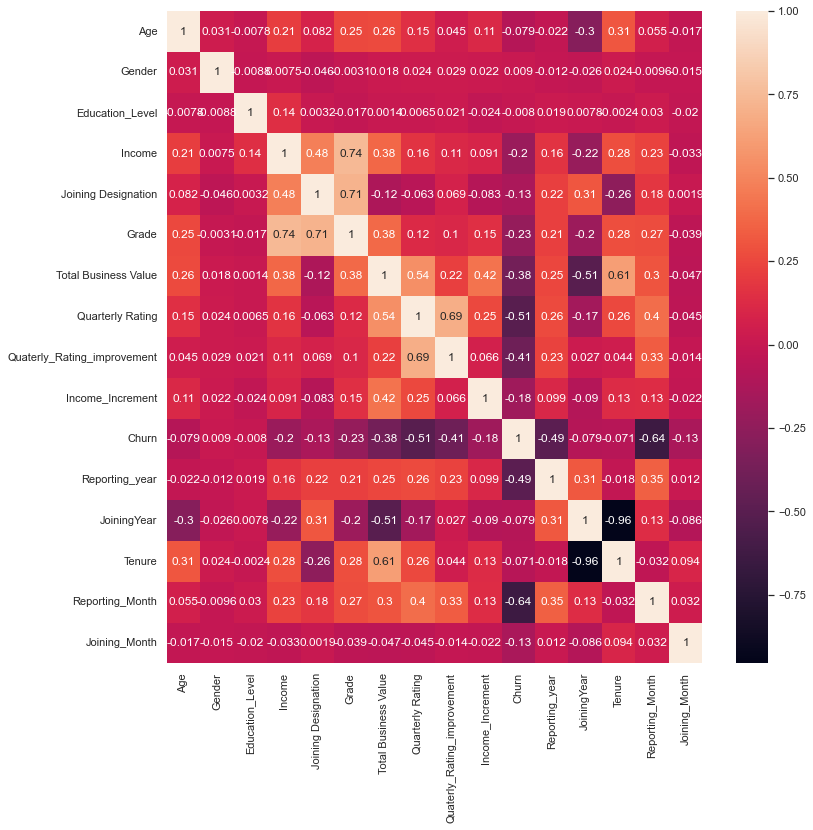

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(df_2.corr(),annot=True)
plt.show()

##### For converting 'City' to numerical, each of the cities is replaced with the corresponding median values of their 'Total Business Value' 

In [62]:
City_train_dict = X_train.groupby(by='City').median()['Total Business Value'].to_dict()
X_train['City'] = X_train['City'].map(City_train_dict)

### Doing the same feature engineering operations on test data SEPERATELY:

In [63]:
# For converting 'City' to numerical, each of the cities is replaced with
# the corresponding median values of their 'Total Business Value'

City_test_dict = X_test.groupby(by='City').median()['Total Business Value'].to_dict()
X_test['City'] = X_test['City'].map(City_test_dict)

In [64]:
print('Traning dataset shape {}'.format(Counter(Y_train)))

Traning dataset shape Counter({1: 1081, 0: 514})


##### It can be observed that, the target is highly imbalanced. So, SMOTE technique is used to make the dataset balanced
    

### Applying SMOTE:

In [65]:
smt=SMOTE()
X_sm, Y_sm = smt.fit_resample(X_train, Y_train)

In [66]:
print('Resampled dataset shape {}'.format(Counter(Y_sm)))

Resampled dataset shape Counter({1: 1081, 0: 1081})


In [67]:
# X_sm.shape

##### We can observe that after applying SMOTE, the data is BALANCED

### Since Decision trees and GB algorithms are not sensitive to the magnitude of variables,  standardization is not needed before fitting these kinds of models

### Ensemble model : Bagging Algorithm using RandomForest

In [68]:
# Defining parameters:

params={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[3,5,7,10,12],
    'bootstrap':[True,False],
    'max_features':[4,7,9,12],
    'ccp_alpha':np.arange(0,0.5,0.03)
}

In [69]:
#  Defining the GridSearch function

rf=RandomForestClassifier(random_state=3)

tuning_function = GridSearchCV(estimator=rf,
                              param_grid=params,
                              scoring='accuracy',
                              cv=3,
                              n_jobs=-1)


In [70]:
start_time=dt.datetime.now()
tuning_function.fit(X_sm,Y_sm)
end_time=dt.datetime.now()

parameters=tuning_function.best_params_
score=tuning_function.best_score_
print(f"Time taken to train : {end_time-start_time}")
print(parameters)
print(score)

Time taken to train : 0:31:49.442459
{'bootstrap': False, 'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': 4, 'n_estimators': 200}
0.9588341809215596


In [71]:
parameters

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'max_depth': 10,
 'max_features': 4,
 'n_estimators': 200}

In [72]:
score

0.9588341809215596

In [73]:
# Building the model using the best parameters, obtained after GridSearchCV

tree_clf = RandomForestClassifier(random_state=3, n_estimators=400, criterion='gini',
                                 max_depth=12, max_features=7, bootstrap=True, ccp_alpha=0.0)

# Cross validating the model
kfold = KFold(n_splits=12)
cv_rf_acc = cross_validate(tree_clf, X_sm, Y_sm, cv=kfold,
                           scoring='accuracy', return_train_score=True)





In [74]:
print(f"K-fold mean accuracy on: \n Train:{cv_rf_acc['train_score'].mean()*100}\n Validation: {cv_rf_acc['test_score'].mean()*100}")

K-fold mean accuracy on: 
 Train:99.83601360587878
 Validation: 95.5599038264784


In [75]:
tree_clf.fit(X_sm,Y_sm)

# Getting the feature importances of all the features
f_importance_rf = tree_clf.feature_importances_



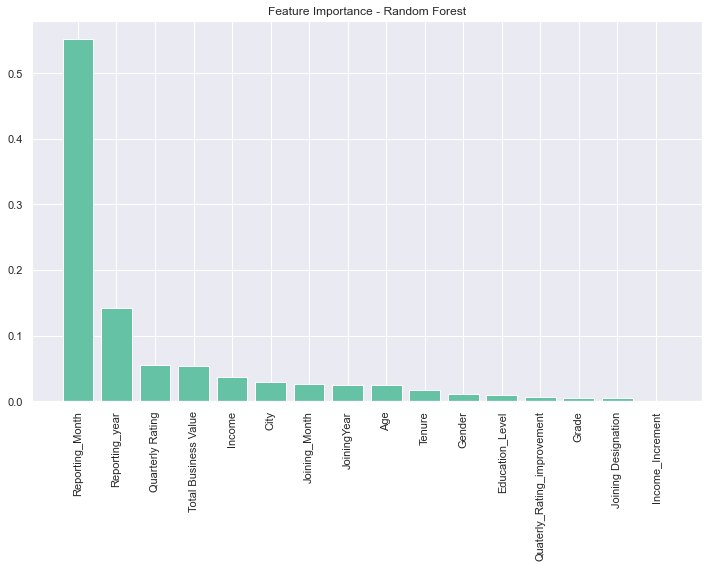

In [76]:
# Sorting the indices of the features in decreasing order of their importance
indices = np.argsort(f_importance_rf)[::-1]

# Storing the names corresponding to the indices
names=[X_sm.columns[i] for i in indices]

# Creating the bar plot:
plt.figure(figsize=(12,7))
plt.title('Feature Importance - Random Forest')
plt.bar(range(X_sm.shape[1]),f_importance_rf[indices])
plt.xticks(range(X_sm.shape[1]), names, rotation=90)
plt.show()

### Observations from feature importance:

1. The most important features are:
            * Reporting month
            * Reporting year
            * Quaterly rating 
            * Total business value
            * Joining month

### Checking accuracy on the test data:

In [77]:
tree_clf.score(X_test,Y_test)

0.9580152671755725

In [78]:
# Getting the predicted probabilities:

Y_pred_RF = tree_clf.predict(X_test)

In [79]:
Y_pred_proba_RF = tree_clf.predict_proba(X_test)[:,1]

In [80]:
# Preparing the combined list for 'Y_actual','Y_predicted','Y_predicted_prob'

Y_rf = list(zip(Y_test,Y_pred_RF,Y_pred_proba_RF))
Y_rf_2=pd.DataFrame(Y_rf,columns=['Y_actual','Y_predicted','Y_predicted_prob'])

In [81]:
Y_rf_2.head()

,Y_actual,Y_predicted,Y_predicted_prob
0,1,1,0.964934
1,1,1,0.522989
2,1,1,0.977211
3,1,1,0.997424
4,1,0,0.265803


##### Finding the value of confusion matrix:

In [82]:
tp=((Y_rf_2['Y_actual']==1) & (Y_rf_2['Y_predicted']==1)).sum()
fp=((Y_rf_2['Y_actual']==0) & (Y_rf_2['Y_predicted']==1)).sum()
tn=((Y_rf_2['Y_actual']==0) & (Y_rf_2['Y_predicted']==0)).sum()
fn=((Y_rf_2['Y_actual']==1) & (Y_rf_2['Y_predicted']==0)).sum()

In [83]:
# Checking whether the sum of count of all the elements 
# of the confusion matrix = the total number of the elements

tp+fp+tn+fn==X_test.shape[0]

True

In [84]:
print(f" * True_Positive:{tp} \n * True_Negative:{tn} \n * False_Positive:{fp} \n * False_Negative:{fn}")

 * True_Positive:511 
 * True_Negative:242 
 * False_Positive:9 
 * False_Negative:24


In [85]:
from sklearn.metrics import (confusion_matrix,ConfusionMatrixDisplay,
roc_curve,roc_auc_score,precision_recall_curve,auc,classification_report,f1_score)

### Random Forest - Confusion matrix:

In [86]:
cm=confusion_matrix(Y_rf_2['Y_actual'],Y_rf_2['Y_predicted'])
cm

array([[242,   9],
       [ 24, 511]], dtype=int64)

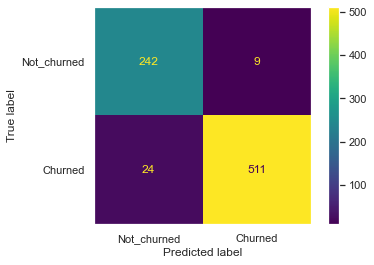

In [87]:
# Displaying the confusion matrix:

ConfusionMatrixDisplay(cm,display_labels=['Not_churned','Churned']).plot()
plt.grid()
plt.show()


### Classification Report:

In [88]:
target_names=['Not_churned','Churned']
print(classification_report(Y_rf_2['Y_actual'],Y_rf_2['Y_predicted'],target_names=target_names))

              precision    recall  f1-score   support

 Not_churned       0.91      0.96      0.94       251
     Churned       0.98      0.96      0.97       535

    accuracy                           0.96       786
   macro avg       0.95      0.96      0.95       786
weighted avg       0.96      0.96      0.96       786



### ROC-AUC curve - Random Forest:

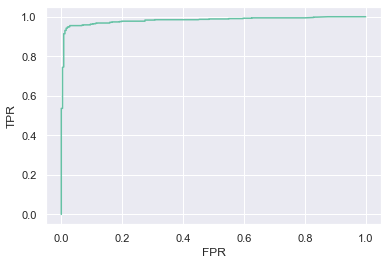

In [89]:
fpr, tpr, thresholds = roc_curve(Y_rf_2['Y_actual'],Y_rf_2['Y_predicted_prob'])

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [90]:
# calculating roc_auc_score:

roc_auc_score(Y_rf_2['Y_actual'],Y_rf_2['Y_predicted_prob'])

0.9823993744647578

In [91]:
precision, recall, thresholds = precision_recall_curve(Y_rf_2['Y_actual'],Y_rf_2['Y_predicted_prob'])

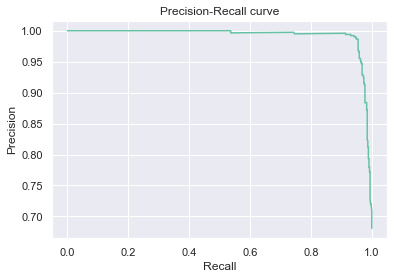

In [92]:
# Plotting precision recall graph:RandomForest

plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [93]:
# AUC for precision recall graph:RandomForest

auc(recall,precision)

0.9926045909647637

In [94]:
! pip install xgboost

### Ensemble model : Boosting Algorithm using XGBoost

In [95]:
from xgboost import XGBClassifier

In [96]:
import datetime as dt

In [97]:
# Defining the parameters for GridSearch:

params={
    'n_estimators':[100,200,300,500,700],
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.3,0.5,0.7],
    'colsample_bytree':[0.5,0.7,0.9,1.0],
    'subsample':[0.5,0.7,0.9,1.0]    
}

In [98]:
xgb = XGBClassifier(random_state=3,objective='binary:logistic')

In [99]:
# GridSearch function

tuning_function_xgboost = GridSearchCV(estimator=xgb,
                              param_grid=params,
                              scoring='accuracy',
                              cv=3,
                              n_jobs=-1)

In [100]:
# JMJ+
# Finding the best parameters and accuracy using gridsearch

start_time=dt.datetime.now()

tuning_function_xgboost.fit(X_sm,Y_sm)

end_time=dt.datetime.now()

parameters_xgboost=tuning_function_xgboost.best_params_
score_xgboost=tuning_function_xgboost.best_score_

print(f" * Time taken for training: {end_time-start_time} \n * Accuracy on training data: {score_xgboost} \n * Best Parameters: {parameters_xgboost}")


 * Time taken for training: 0:03:49.079951 
 * Accuracy on training data: 0.9551336877793188 
 * Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [101]:
# Finding the best model based on the parameters of gridsearch:

best_xgb = XGBClassifier(random_state=3,n_estimators=300, objective='binary:logistic',
                         learning_rate=0.1, max_depth=5,
                         colsample_bytree=0.5, subsample=0.9)
# Cross validating the model
kfold = KFold(n_splits=12)
cv_gb_acc = cross_validate(best_xgb, X_sm, Y_sm, cv=kfold,
                           scoring='accuracy', return_train_score=True)
 

In [102]:
print(f"K-fold mean accuracy for XG-Boost on: \n Train:{cv_gb_acc['train_score'].mean()*100}\n Validation: {cv_gb_acc['test_score'].mean()*100}")

K-fold mean accuracy for XG-Boost on: 
 Train:100.0
 Validation: 95.93052997749129


### Feature importance : XGBoost

In [103]:
best_xgb.fit(X_sm,Y_sm)

# Getting the feature importances of all the features
f_importance_gb = best_xgb.feature_importances_



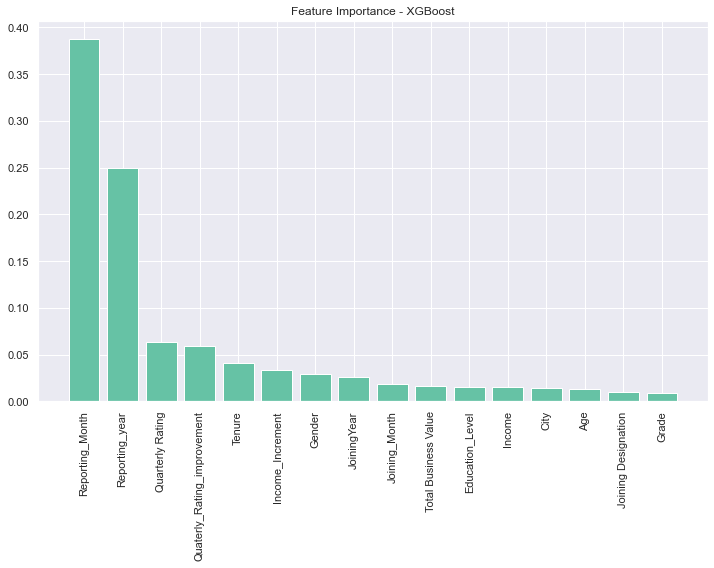

In [104]:
# Sorting the indices of the features in decreasing order of their importance
indices = np.argsort(f_importance_gb)[::-1]

# Storing the names corresponding to the indices
names=[X_sm.columns[i] for i in indices]

# Creating the bar plot:
plt.figure(figsize=(12,7))
plt.title('Feature Importance - XGBoost')
plt.bar(range(X_sm.shape[1]),f_importance_gb[indices])
plt.xticks(range(X_sm.shape[1]), names, rotation=90)
plt.show()

Most important features as per XGBoost are:

    * Reporting month
    * Reporting year
    * Quaterly rating improvement
    * Quaterly rating
    * Tenure

### Checking accuracy on the test data:

In [105]:
best_xgb.score(X_test,Y_test)

0.950381679389313

In [106]:
# Getting the predicted probabilities:

Y_pred_XGB = best_xgb.predict(X_test)

Y_pred_proba_XGB = best_xgb.predict_proba(X_test)[:,1]

In [107]:
# Preparing the combined list for 'Y_actual','Y_predicted','Y_predicted_prob'

Y_XGB = list(zip(Y_test,Y_pred_XGB,Y_pred_proba_XGB))
Y_XGB_2=pd.DataFrame(Y_XGB,columns=['Y_actual','Y_predicted','Y_predicted_prob'])

Y_XGB_2.head()


,Y_actual,Y_predicted,Y_predicted_prob
0,1,1,0.976843
1,1,0,0.491785
2,1,1,0.991919
3,1,1,0.999687
4,1,0,0.186370


##### Finding the value of confusion matrix: XGBoost

In [108]:
tp=((Y_XGB_2['Y_actual']==1) & (Y_XGB_2['Y_predicted']==1)).sum()
fp=((Y_XGB_2['Y_actual']==0) & (Y_XGB_2['Y_predicted']==1)).sum()
tn=((Y_XGB_2['Y_actual']==0) & (Y_XGB_2['Y_predicted']==0)).sum()
fn=((Y_XGB_2['Y_actual']==1) & (Y_XGB_2['Y_predicted']==0)).sum()

In [109]:
# Checking whether the sum of count of all the elements 
# of the confusion matrix = the total number of the elements

tp+fp+tn+fn==X_test.shape[0]

True

In [110]:
print(f" * True_Positive:{tp} \n * True_Negative:{tn} \n * False_Positive:{fp} \n * False_Negative:{fn}")

 * True_Positive:507 
 * True_Negative:240 
 * False_Positive:11 
 * False_Negative:28


### Confusion matrix - XGBoost:

In [111]:
cm_XGB=confusion_matrix(Y_XGB_2['Y_actual'],Y_XGB_2['Y_predicted'])
cm_XGB


array([[240,  11],
       [ 28, 507]], dtype=int64)

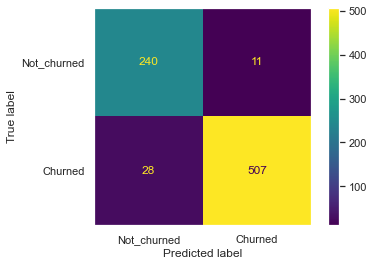

In [112]:
# Displaying the confusion matrix:

ConfusionMatrixDisplay(cm_XGB,display_labels=['Not_churned','Churned']).plot()
plt.grid()
plt.show()

### Classification Report - XGBoost:

In [113]:


target_names=['Not_churned','Churned']
print(classification_report(Y_XGB_2['Y_actual'],Y_XGB_2['Y_predicted'],target_names=target_names))


              precision    recall  f1-score   support

 Not_churned       0.90      0.96      0.92       251
     Churned       0.98      0.95      0.96       535

    accuracy                           0.95       786
   macro avg       0.94      0.95      0.94       786
weighted avg       0.95      0.95      0.95       786



### ROC-AUC curve - XGBoost:

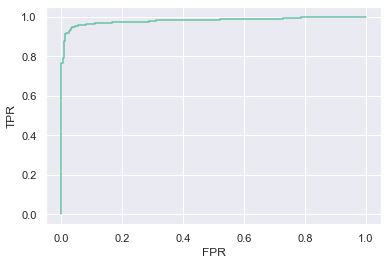

In [114]:


fpr, tpr, thresholds = roc_curve(Y_XGB_2['Y_actual'],Y_XGB_2['Y_predicted_prob'])

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [115]:
# calculating roc_auc_score:

roc_auc_score(Y_XGB_2['Y_actual'],Y_XGB_2['Y_predicted_prob'])


0.9816211788360576

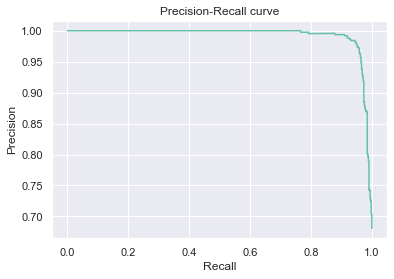

In [116]:
# Plotting precision recall graph : XGBoost

precision, recall, thresholds = precision_recall_curve(Y_XGB_2['Y_actual'],Y_XGB_2['Y_predicted_prob'])

plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()



In [117]:
# AUC for precision recall graph:XGBoost

auc(recall,precision)

0.9926540928372743

### Comparison of RandomForest and XGBoost:

In [126]:
# Preparing the dictionary:

comp_dict={'Parameters':['Accuracy', 'Precision', 'Recall', 'AUC_ROC', 'AUC(Precision-Recall)','n_estimators', 'max_depth'],
          'RandomForest':[0.95801,0.98,0.94,0.97176,0.98600,200,10],
          'XGBoost':[0.9503,0.98,0.94,0.97153,0.98657,100,5]}

In [127]:
df_comp=pd.DataFrame(comp_dict)
df_comp.set_index('Parameters',inplace=True)

In [128]:
df_comp

,RandomForest,XGBoost
Parameters,,
Accuracy,0.95801,0.95030
Precision,0.98000,0.98000
Recall,0.94000,0.94000
AUC_ROC,0.97176,0.97153
AUC(Precision-Recall),0.98600,0.98657
n_estimators,200.00000,100.00000
max_depth,10.00000,5.00000


##### Observations:

* Accuracy: RandomForest has a slightly better performance than XGBoost
* Other performance metrics are very similar for both the models 

### Observations based on performance metrics of both the models:

##### 1. confusion matrix:
    - Values are very similar in both the models
    - However, RF have a slightly better performance compared to XGBoost wrto. FP and FN
    
##### 2. roc_auc_score:
    - Both the models have high value, indicating that both of them perform good
    - RF have a slightly better performance compared to XGBoost
    
##### 3.  Precision-Recall:
    - Values are similar in both the models
    - AUC(Precision-Recall): RF have a slightly better performance compared to XGBoost
    - In the given casestudy, FalseNegative are more critical than FalsePositives, i.e. model predicts that, driver donot churn, actually the driver churned
    - Recall should be prioritized over precision

##### 4. f1-score:
    - Both the models have same values

### General Insights:

1. Very few drivers showed improvement in  quaterly rating(15%) and income(1.8%)
2. After the analysis, it can be observed that, churning donot depend much on education level or age
3. Quaterly rating 1 and 2 witnessed the highest churning, and similar trend can be witnessed for grades also
4. Median value for total business generated for churned drivers is far less than for their counterparts
5. Most of the drivers stay for 0-1 years before they leave the firm
6. Variation in income and quaterly rating has a strong dependency on the churn rate

### Business reccomendation: 

1. Improvements in quaterly rating, income and total business value can be considered as the deciding factors in the attrition of drivers

2. It can be observed that, drivers who donot see much improvements in the above mentioned factors are most likely to leave the firm within 2 years

3. So its important that drivers are given good consideration in terms of compensation and other benefits in the initial years

4. Other benefits such as cashbacks, fuel subsidy, part-time study options, insurance etc. for the drivers who have completed the initial years

5. Ensure that, the drivers per city are selected on the basis of requirement only. Otherwise, churning rate would rise

6. Drivers are most likely to be retained if there are good difference in salary between the consecutive grades and rating, as at higher ratings, churning rate is less

7. As from the feature importance, it is clear that, reporting month and reporting year have strong correlation with the churn rate. Firm should work on the season in which churn rate is more or provide some additional incentives to combat this.

JMJ+